In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


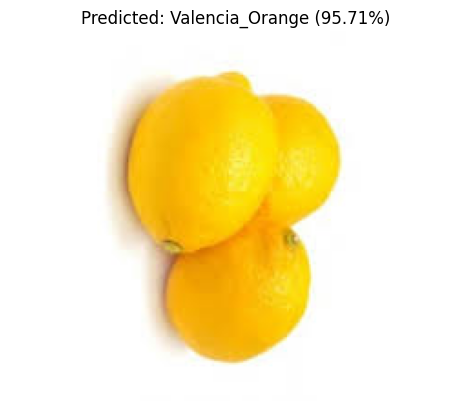

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import DepthwiseConv2D

# Define fixed DepthwiseConv2D layer to handle compatibility
class FixedDepthwiseConv2D(DepthwiseConv2D):
    def __init__(self, *args, **kwargs):
        kwargs.pop('groups', None)
        super().__init__(*args, **kwargs)

# Load the model with custom layer
model = load_model(
    '/kaggle/input/fruit-yield/FruitYield DataSet/Kind/Kind_model.h5',
    custom_objects={'DepthwiseConv2D': FixedDepthwiseConv2D}
)

# Define class names (update if different)
class_names = [
    'Alphonso_Mango', 'Arka_Mridula_Guava', 'Bitter_Orange', 'Dosehri_Mango',
    'Envy_Apple', 'Hriyali_Guava', 'Local_Sindhi_Guava', 'Navel_Orange',
    'Red_Delicious_Apple', 'Shimla_Apple', 'Totapuri_Mango', 'Valencia_Orange'
]

def predict_fruit(image_path):
    # Load and preprocess image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))  # Match model's expected input
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make prediction
    preds = model.predict(img)
    pred_class = np.argmax(preds)
    confidence = np.max(preds)

    # Display results
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted: {class_names[pred_class]} ({confidence:.2%})")
    plt.axis('off')
    plt.show()

# Test on an image
test_image_path = '/kaggle/input/fruit-yield/FruitYield DataSet/Kind/Test/Valencia_Orange/Valencia_Orange (24).jpg'
predict_fruit(test_image_path)